# Data Science - Customer Segmentation project

## Firstly what and why Customer Segmentation ?

#### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
 
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler,MinMaxScaler


from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN, spectral_clustering

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples,silhouette_score
# silhoutte samples returns the silhouette values for each data point.
# silhouette score returns the mean of all silhouette samples.

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Printing the versions of all the libraries.

import matplotlib
import sklearn
import scipy

print(f'Pandas version : {pd.__version__}')
print(f'Numpy version : {np.__version__}')
print(f'Seaborn version : {sns.__version__}')
print(f'Matplotlib version : {matplotlib.__version__}')
print(f'Sklearn version : {sklearn.__version__}')
print(f'scipy version : {scipy.__version__}')

Pandas version : 1.4.3
Numpy version : 1.23.1
Seaborn version : 0.11.2
Matplotlib version : 3.5.2
Sklearn version : 1.1.1
scipy version : 1.8.1


In [3]:
import warnings 
warnings.filterwarnings('ignore')

# 1. Loading the DataSet

In [4]:
customers = pd.read_csv('customer-segmentation-dataset/Mall_Customers.csv')

In [5]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. Feature Engineering
( Using numpy and pandas )

In [6]:
customers.shape

(200, 5)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Checking Null values
customers.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

<AxesSubplot:>

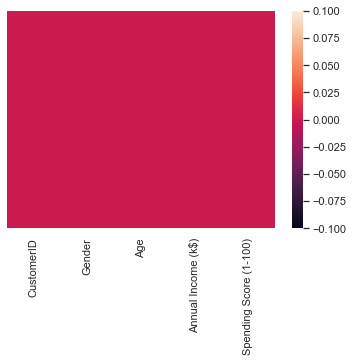

In [9]:
sns.heatmap(customers.isnull() , yticklabels=False)

In [10]:
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
customers = pd.get_dummies(customers)

# or we can just use label encoder

In [12]:
customers.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [13]:
customers.drop(['Gender_Male'],axis='columns',inplace=True)

In [14]:
customers.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [15]:
customers.rename(columns = {'Gender_Female':'Gender'}, inplace = True)

In [16]:
customers.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


# 3. EDA : Analysing, Exploring and visualizing the Data 
( Using Matplotlib and seaborn )

In [17]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


In [18]:
#correlation estimate
customers.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109
Gender,-0.057400,-0.060867,-0.056410,0.058109,1.000000


Text(0, 0.5, 'Spending Score (1-100)')

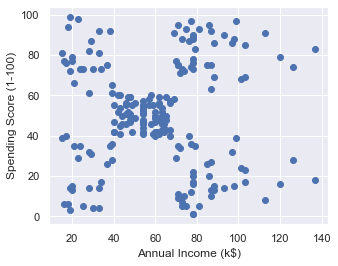

In [19]:
plt.figure(figsize=(5,4))
plt.scatter(customers['Annual Income (k$)'],customers['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Spending Score (1-100)')

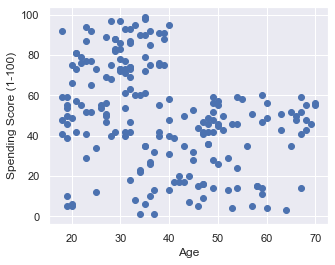

In [20]:
plt.figure(figsize=(5,4))
plt.scatter(customers.Age, customers['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

### 3-D graph

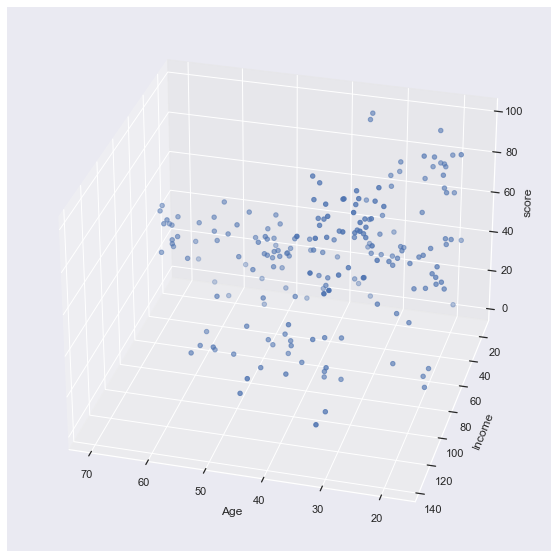

In [21]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(customers['Age'] , customers['Annual Income (k$)'], customers['Spending Score (1-100)'])
ax.view_init(30,105)
plt.xlabel('Age')
plt.ylabel('Income')
ax.set_zlabel('score')
plt.show()

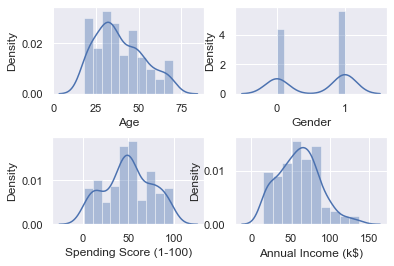

In [22]:
# Distribution plots for all the variables:
n = 0
for x in ['Age'  ,'Gender' , 'Spending Score (1-100)','Annual Income (k$)']:
    n+=1

    plt.subplot(2,2,n)
    plt.subplots_adjust(hspace=0.5)
    
    sns.distplot(customers[x] , bins=10)


Text(0, 0.5, 'Gender')

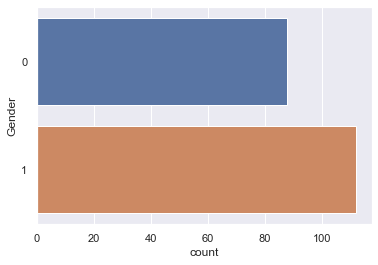

In [23]:
# Count plot
sns.countplot(y=customers['Gender'].values)
plt.ylabel('Gender')

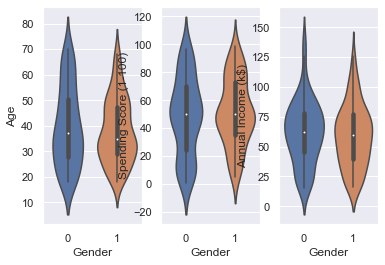

In [24]:
# Violin plots for all the variables with respect to Gender:
n = 0
for col in ['Age'  , 'Spending Score (1-100)','Annual Income (k$)']:
    n+=1

    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5)
    
    sns.violinplot(y=col , x='Gender' , data = customers)
    

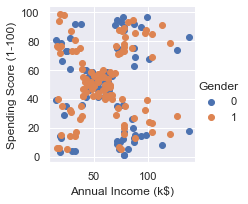

In [25]:
sns.FacetGrid(data =customers , hue = 'Gender').map(plt.scatter,'Annual Income (k$)' , 'Spending Score (1-100)').add_legend()

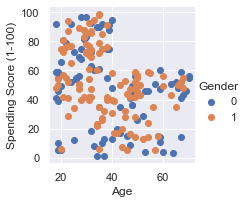

In [26]:
sns.FacetGrid(data =customers , hue = 'Gender').map(plt.scatter,'Age' , 'Spending Score (1-100)').add_legend()

In [27]:
customers.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


#### Multivariate Analysis using pairplot

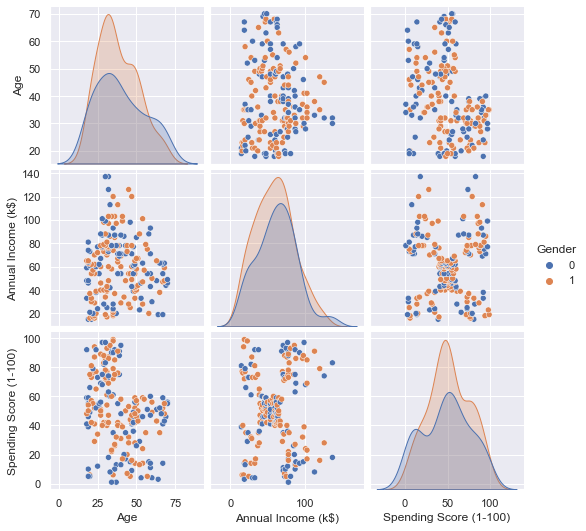

In [28]:
sns.pairplot(customers.drop(['CustomerID'] , axis=1) , hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

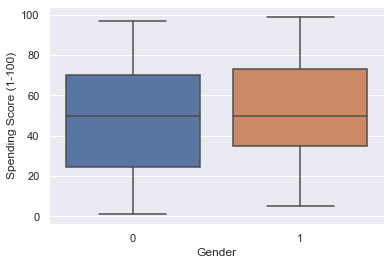

In [29]:
# box plot:
sns.boxplot(x = 'Gender' , y = 'Spending Score (1-100)' , data=customers)

In [30]:
# scaling the data.
customers_original = customers.copy()

scalar = MinMaxScaler()
customer_id = customers.CustomerID
customers = pd.DataFrame(scalar.fit_transform(customers.drop(['CustomerID'] , axis='columns')) , columns =['Age','Annual Income (k$)','Spending Score (1-100)','Gender'] )
customers['CustomerID'] = customer_id
customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,CustomerID
0,0.019231,0.000000,0.387755,0.0,1
1,0.057692,0.000000,0.816327,0.0,2
2,0.038462,0.008197,0.051020,1.0,3
3,0.096154,0.008197,0.775510,1.0,4
4,0.250000,0.016393,0.397959,1.0,5


# 4. Performing Clustering Using machine learning Algorithms

### We will be performing Customer segmentation using 
- K-Means clustering
- Hierarchical clustering
- DBSCAN


### The procedure for using these models will also be similar, but for now we will only perform clustering using the above 3 allgorithms.
- spectral clustering
- Gaussuan Mixture Models

Validating clustering models :
- Sihouette clustering(validating clustering models)


The these techniques may suffer from curse of dimentionality.( Not in our case as there are only four columns )
So solutions are:
- use dimentional red(PCA) and then traditional clustering

In [31]:
customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,CustomerID
0,0.019231,0.000000,0.387755,0.0,1
1,0.057692,0.000000,0.816327,0.0,2
2,0.038462,0.008197,0.051020,1.0,3
3,0.096154,0.008197,0.775510,1.0,4
4,0.250000,0.016393,0.397959,1.0,5


In [32]:
x = customers.drop(['CustomerID','Age','Gender'],axis='columns')

In [33]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## K-Means clustering

First, we have to find the optimum number of clusters.
This is done using elbow method.

###  Elbow method.


In [34]:
#in each iteration we calculate within clusters sum of squares
def elbow_method(data):
    try:
        wcss = []
        for i in range(1,11):
            demo_model = KMeans(n_clusters=i, init='k-means++',random_state=0)
            demo_model.fit(data)
            wcss.append(demo_model.inertia_)
        plt.figure(figsize=(5,4))

        plt.plot(range(1,11) , wcss)
        plt.title('Elbow method results')
        plt.xlabel('K value')
        plt.ylabel('wcss')
        plt.show
    except:
        print('Error : Please check the data you have provided.')

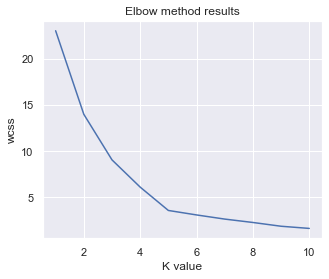

In [35]:
elbow_method(x)

In [36]:
def kmeans_func(data , n , print_graph = 1):
    if (print_graph > 1 or print_graph <0):
        print('Error : print_graph value must be either 0 or 1')
        return 0 , 0
    try : 
        model_kmeans = KMeans(n_clusters=n, init='k-means++',random_state=0,)

        y_kmeans = model_kmeans.fit_predict(data)
        centroids = model_kmeans.cluster_centers_


        #plotting the results.
        if data.shape[1] == 2 and  print_graph == 1:
            plt.figure(figsize=(5,4))
            for i in set(y_kmeans):
                a1 = data.values[y_kmeans == i , 0]
                b1= data.values[y_kmeans == i , 1]
                plt.scatter(a1,b1,label=f'Cluster {i}')


            plt.scatter(centroids[:,0],centroids[:,1],s=100,color='black',label='Centroids')


            plt.xlabel('x_axis')
            plt.ylabel('y_axis')
            plt.title('Customer segmentation')
            plt.legend()
            plt.show()
        return y_kmeans , centroids
    except:
        print('Error : Please check the data, value of n you have provided')
        return 0,0

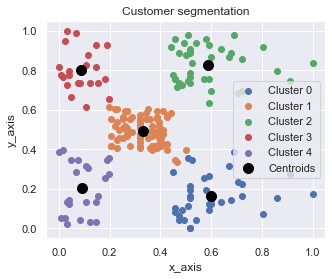

In [37]:
y_kmeans , centroids = kmeans_func(x,5)


In [38]:
y_kmeans , centroids

(array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
        4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
        1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2]),
 array([[0.6       , 0.16443149],
        [0.33029751, 0.49508692],
        [0.58638083, 0.82783883],
        [0.08792846, 0.79962894],
        [0.09265859, 0.20319432]]))

# Hierarchical clustering

In [39]:
def draw_dendrogram(data):
    try : 
        plt.figure(figsize=(5,4))

        model_hierarchical_linkage = linkage(data, method='ward')
        plt.title('Hierarchical clustering dendrogram')
        dendrogram(model_hierarchical_linkage,truncate_mode='level',p=10)
        plt.show()
    except:
        print('Error : Please check the data you have provided')

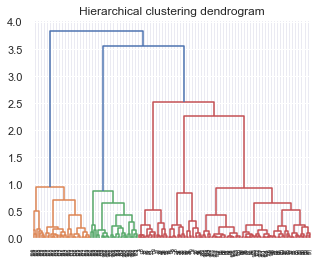

In [40]:
draw_dendrogram(x)

In [41]:
def hierarchical_func(data , n  ,  print_graph = 1):
    if (print_graph > 1 or print_graph <0):
        print('Error : print_graph value must be either 0 or 1')
        return 0
    try : 
        model_hierarchical_linkage = linkage(data, method='ward')
        #returns a alinkage matrix
        #hier_cluster


        model_hier = AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')

        y_hier = model_hier.fit_predict(data)

        if print_graph == 1:
            plt.figure(figsize=(5,4))
            plt.title('Hierarchical clustering dendrogram')
            dendrogram(model_hierarchical_linkage,truncate_mode='level',p=10)
            plt.show()
            if data.shape[1] == 2 :

                for i in set(y_hier):
                    plt.scatter((data[y_hier==i]).iloc[:,0].values , (data[y_hier==i]).iloc[:,1].values)

                plt.xlabel('x_axis')
                plt.ylabel('y_axis')

        return y_hier
    except:
        print('Error : Please check the data you have provided')
        return 0
    

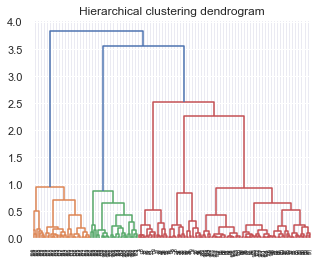

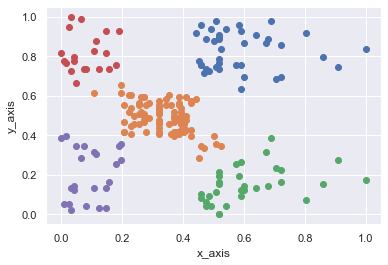

In [42]:
y_hier = hierarchical_func(x,5)

In [43]:
y_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

## DBSCAN clustering
(Density Based Spatial Clustering of Applications with Noise

In [44]:
def dbscan_func(data , eps , min_samples, print_graph=1):
    if (print_graph > 1 or print_graph <0):
        print('Error : print_graph value must be either 0 or 1')
        return 0
    try : 
        model_dbscan = DBSCAN(eps=eps, min_samples = min_samples)
        model_dbscan.fit(x)
        y_dbscan = model_dbscan.labels_
        dbscan_clusters = set(y_dbscan) - set([-1])


        if print_graph == 1 and data.shape[1] == 2:
            for j in dbscan_clusters:
                plt.scatter(data.values[model_dbscan.labels_==j,0] , data.values[model_dbscan.labels_==j,1])
            plt.show()
        return (y_dbscan)
    except:
        print('Error : Please check the data,eps,min_samples you have provided')
        return 0

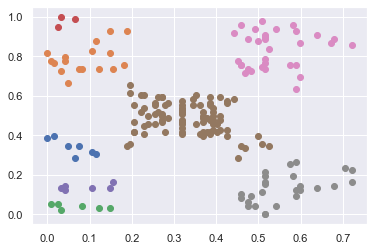

In [45]:
y_dbscan = dbscan_func(x , 0.07,3,1)

In [46]:
dbscan_clusters = set(y_dbscan) - set([-1])
dbscan_clusters

{0, 1, 2, 3, 4, 5, 6, 7}

In [47]:
y_dbscan

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  4,  3,  4,  1,  4,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  4,  1,  0, -1,  0,  1,  2,  1,  2,  1,
        4,  1,  4,  1, -1,  1,  5,  1,  5,  5, -1,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  5,  6,  5,  6,  7,  6,  7,  6,  5,  6,  7,  6,
        7,  6,  7,  6,  7,  6,  5,  6,  7,  6,  5,  6,  7,  6,  7,  6,  7,
        6,  7,  6,  7,  6,  7,  6,  5,  6,  7,  6,  7,  6,  7,  6,  7,  6,
        7,  6,  7,  6,  7,  6,  7,  6,  7,  6, -1,  6,  7,  6, -1, -1,  7,
       -1,  7,  6,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

# 5. Silhouette Validation technique
( Validating clustering models )

In [48]:
# To compute silhouette score of a model:
print(silhouette_score(x,y_kmeans))

# check score for models with different parameters
for i in range(3,17):
    temp = kmeans_func(x,i,0)[0]
    print(f'clusters : {i} , silhouette score :{silhouette_score(x, temp )}')
    

0.5594854531227246
clusters : 3 , silhouette score :0.4514909309424474
clusters : 4 , silhouette score :0.49620078745146784
clusters : 5 , silhouette score :0.5594854531227246
clusters : 6 , silhouette score :0.5377658512956012
clusters : 7 , silhouette score :0.5258817307975516
clusters : 8 , silhouette score :0.4977276708141946
clusters : 9 , silhouette score :0.44293867395812975
clusters : 10 , silhouette score :0.44607278944436446
clusters : 11 , silhouette score :0.43900741691806294
clusters : 12 , silhouette score :0.4343195557939575
clusters : 13 , silhouette score :0.4344544224397771
clusters : 14 , silhouette score :0.42798872716414516
clusters : 15 , silhouette score :0.4381650583803275
clusters : 16 , silhouette score :0.4299846694096196


In [49]:
print(silhouette_score(x,y_hier))

for i in range(3,17):
    temp  = hierarchical_func(x,i,0)
    print(f'clusters : {i} , silhouette score :{silhouette_score(x, temp )}')
    

0.5582698727196419
clusters : 3 , silhouette score :0.44796167261691394
clusters : 4 , silhouette score :0.4976418539903167
clusters : 5 , silhouette score :0.5582698727196419
clusters : 6 , silhouette score :0.5296670434232814
clusters : 7 , silhouette score :0.409308025869031
clusters : 8 , silhouette score :0.41055127971395405
clusters : 9 , silhouette score :0.4177210331066167
clusters : 10 , silhouette score :0.42320643020741444
clusters : 11 , silhouette score :0.42096671148649195
clusters : 12 , silhouette score :0.4044313966445574
clusters : 13 , silhouette score :0.416296258096596
clusters : 14 , silhouette score :0.4098579432320757
clusters : 15 , silhouette score :0.41538448880135465
clusters : 16 , silhouette score :0.4148026286749414


In [50]:
print(silhouette_score(x.values[y_dbscan!=-1], y_dbscan[y_dbscan!=-1] ))
(np.array(silhouette_samples(x.values[y_dbscan!=-1], y_dbscan[y_dbscan!=-1] ))).mean()

0.5289145810501299


0.5289145810501299

In [51]:
# For DBSCAN it seems that the score lower than kmeans and hierarchical clustering.
# We dont give the n_clusters parameter to DBSCAN.

#So we will find the optimum parameters using silhouette method.
# The parameters for which the silhoutte score is high are the optimal parameters.

scores = pd.DataFrame(columns=['eps','min_samples','score','clusters'])
for i in range(4,14):
    eps = i/100
    for k in [i-3,i-2,i-1,i,i+1,i+2,i+3,i]:
        
        min_samples = k
        labels = dbscan_func(x , eps,min_samples,0)
        #labels = dbscan_func(x , 0.07,3,0)
        clusters = set(labels) - set([-1])
        clusters = len(clusters)
        s_x = x.values[labels!=-1]
        s_y = labels[labels!=-1]
        
        scores = scores.append({'eps':eps, 'min_samples' : min_samples , 'score':silhouette_score(s_x,s_y),
                                'clusters':clusters} , ignore_index=True)
        
        print(f"""Total clusters : {clusters} , silhouette score :{silhouette_score(s_x,s_y)} ,
                  model:DBSCAN(eps={eps} , min_samples = {min_samples})""")
    

Total clusters : 69 , silhouette score :0.1673799552852169 ,
                  model:DBSCAN(eps=0.04 , min_samples = 1)
Total clusters : 28 , silhouette score :0.439989165833305 ,
                  model:DBSCAN(eps=0.04 , min_samples = 2)
Total clusters : 10 , silhouette score :0.5816803228213961 ,
                  model:DBSCAN(eps=0.04 , min_samples = 3)
Total clusters : 6 , silhouette score :0.6300451057155286 ,
                  model:DBSCAN(eps=0.04 , min_samples = 4)
Total clusters : 4 , silhouette score :0.6431765282821513 ,
                  model:DBSCAN(eps=0.04 , min_samples = 5)
Total clusters : 3 , silhouette score :0.6175766988701777 ,
                  model:DBSCAN(eps=0.04 , min_samples = 6)
Total clusters : 2 , silhouette score :0.6617709076835319 ,
                  model:DBSCAN(eps=0.04 , min_samples = 7)
Total clusters : 6 , silhouette score :0.6300451057155286 ,
                  model:DBSCAN(eps=0.04 , min_samples = 4)
Total clusters : 23 , silhouette score :0.3907

Total clusters : 3 , silhouette score :0.5171359077051453 ,
                  model:DBSCAN(eps=0.12 , min_samples = 12)
Total clusters : 3 , silhouette score :0.3595617456435404 ,
                  model:DBSCAN(eps=0.13 , min_samples = 10)
Total clusters : 3 , silhouette score :0.3595617456435404 ,
                  model:DBSCAN(eps=0.13 , min_samples = 11)
Total clusters : 2 , silhouette score :0.43196490198115883 ,
                  model:DBSCAN(eps=0.13 , min_samples = 12)
Total clusters : 3 , silhouette score :0.5252098024270901 ,
                  model:DBSCAN(eps=0.13 , min_samples = 13)
Total clusters : 3 , silhouette score :0.5252098024270901 ,
                  model:DBSCAN(eps=0.13 , min_samples = 14)
Total clusters : 3 , silhouette score :0.5252098024270901 ,
                  model:DBSCAN(eps=0.13 , min_samples = 15)
Total clusters : 3 , silhouette score :0.6097666669160707 ,
                  model:DBSCAN(eps=0.13 , min_samples = 16)
Total clusters : 3 , silhouette score :

In [52]:
scores[scores.clusters ==5][scores.score > 0.5]

,eps,min_samples,score,clusters
20,0.06,7.0,0.627766,5.0
21,0.06,8.0,0.624936,5.0
27,0.07,7.0,0.583421,5.0
28,0.07,8.0,0.621717,5.0
31,0.07,7.0,0.583421,5.0
34,0.08,7.0,0.578836,5.0
37,0.08,10.0,0.542333,5.0
40,0.09,6.0,0.557994,5.0
44,0.09,10.0,0.588303,5.0
49,0.10,8.0,0.563096,5.0


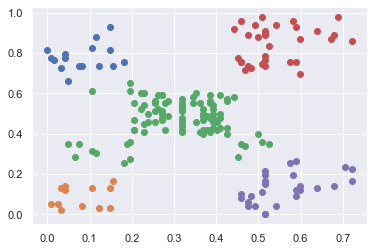

{0, 1, 2, 3, 4}


In [53]:
y_dbscan_2 = dbscan_func(x , 0.11,9,1)

dbscan_2_clusters = set(y_dbscan_2) - set([-1])
print(dbscan_2_clusters)


In [54]:
# our final silhouette score:

silhouette_score(x.values[y_dbscan_2!=-1],y_dbscan_2[y_dbscan_2!=-1])

#we filter x,y because, the points with label -1 are considered as noise points which do not come under any cluster.

0.5621105269238443

In [55]:
len(x.values[y_dbscan_2!=-1])

181

## Silhouette scores of all the models until now:

In [56]:
# Annual Income VS Spending score

print(f'KMeans : {silhouette_score(x , y_kmeans)}')
print(f'Hierarchical : {silhouette_score(x , y_hier)}')
print(f'DBSCAN_non_optimized : {silhouette_score(x.values[y_dbscan!=-1] , y_dbscan_2[y_dbscan!=-1])}')
print(f'DBSCAN_optimized : {silhouette_score(x.values[y_dbscan_2!=-1] , y_dbscan_2[y_dbscan_2!=-1])}')

KMeans : 0.5594854531227246
Hierarchical : 0.5582698727196419
DBSCAN_non_optimized : 0.5363479074158881
DBSCAN_optimized : 0.5621105269238443


# 6. Choosing the best clustering model.

The silhouette score of DBSCAN_optimized is higher than other models. But DBSCAN ignores noise points which may be important to be clustered.
#### since we dont want to loose any points, hereby we dont use dbscan
So We choose kMeans model as it clusteres all the points and also has the second highest Silhouette score.

- so we will append a column to the Dataframe, which denotes the segment the customer falls into , by the analysis of  Annual Income (k$) Vs Spending Score (1-100)

In [57]:
final_result = customers_original.copy()
final_result['IncomeVSscore_cluster'] = y_kmeans
final_result.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster
0,1,19,15,39,0,4
1,2,21,15,81,0,3
2,3,20,16,6,1,4
3,4,23,16,77,1,3
4,5,31,17,40,1,4


#### Age VS spending score

In [58]:
x2 = customers.drop(['CustomerID' , 'Gender' , 'Annual Income (k$)'] , axis=1)

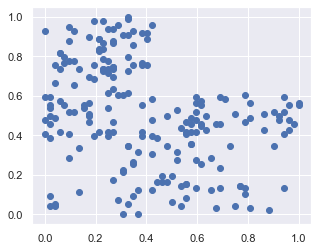

In [59]:
plt.figure(figsize=(5,4))

plt.scatter(x2.values[:,0] , x2.values[:,1])

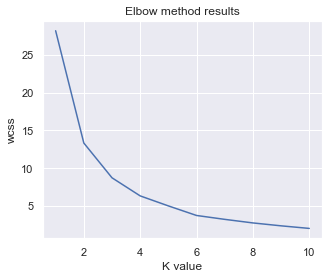

In [60]:
elbow_method(x2)

In [61]:
print('KMeans --: ')
for i in range(2,11):    
    print(silhouette_score(x2, kmeans_func(x2,i,0)[0]))
print('Hierarchical --: ')  
for i in range(2,11):    
    print(silhouette_score(x2, hierarchical_func(x2,i,0)))

KMeans --: 
0.47252865228696783
0.44058221683010546
0.4359241957977821
0.4444600257824891
0.45069458283615743
0.4073018916350244
0.41433373193882406
0.4219861939586639
0.4398702282269234
Hierarchical --: 
0.41699937625242867
0.417124576652748
0.3898644314748176
0.37668241046330797
0.39920932010291066
0.3589298217276204
0.3611306861915168
0.3657953810746083
0.36870509584171


In [62]:
final_result['AgeVSscore_cluster'] =  kmeans_func(x2,2,0)[0]
final_result

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster
0,1,19,15,39,0,4,1
1,2,21,15,81,0,3,1
2,3,20,16,6,1,4,0
3,4,23,16,77,1,3,1
4,5,31,17,40,1,4,1
...,...,...,...,...,...,...,...
195,196,35,120,79,1,2,1
196,197,45,126,28,1,0,0
197,198,32,126,74,0,2,1
198,199,32,137,18,0,0,0


#### Gender VS spending score

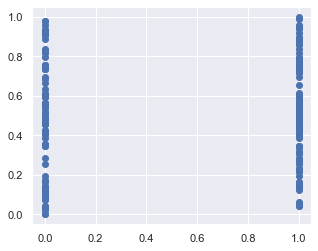

In [63]:
plt.figure(figsize=(5,4))

plt.scatter(customers['Gender'] , customers['Spending Score (1-100)'])

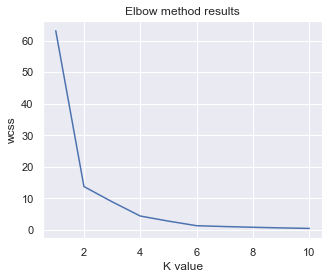

In [64]:
elbow_method(customers.drop(['CustomerID' , 'Age' , 'Annual Income (k$)'] , axis=1))

In [65]:
final_result.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster
0,1,19,15,39,0,4,1
1,2,21,15,81,0,3,1
2,3,20,16,6,1,4,0
3,4,23,16,77,1,3,1
4,5,31,17,40,1,4,1


#### Age VS income VS spending score

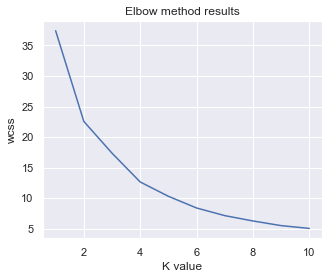

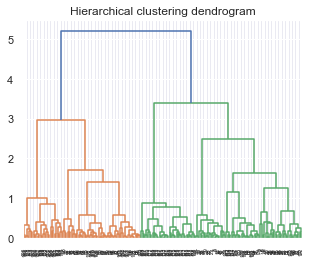

In [66]:
x3 = customers.drop(['CustomerID' , 'Gender'] , axis=1)

elbow_method(x3)
plt.show()
draw_dendrogram(x3)

In [67]:
print('KMeans --: ')
for i in range(2,11):    
    print(silhouette_score(x3, kmeans_func(x3,i,0)[0]))
print('Hierarchical --: ')  
for i in range(2,11):    
    print(silhouette_score(x3, hierarchical_func(x3,i,0)))

KMeans --: 
0.3652498066402899
0.36504262943838
0.392319202055722
0.40611743307078185
0.4236179774932915
0.42493242141407167
0.41649022645449635
0.42728417845627176
0.42533993255540126
Hierarchical --: 
0.33752602297520423
0.3409532813833087
0.3652325990107206
0.3955454334726547
0.39826514063301693
0.40553945327886154
0.3927075663113482
0.3973109679173157
0.40084077303418636


In [68]:
final_result['AgeVSincomeVSscore'] = kmeans_func(x3,4,0)[0]
final_result.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
0,1,19,15,39,0,4,1,3
1,2,21,15,81,0,3,1,3
2,3,20,16,6,1,4,0,3
3,4,23,16,77,1,3,1,3
4,5,31,17,40,1,4,1,3


#### income VS Gender VS spending score

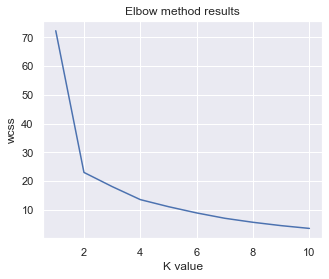

In [69]:
x5 = customers.drop(['CustomerID' , 'Age'] , axis=1)

elbow_method(x5)
plt.show()

In [70]:
array = (kmeans_func(x5,2,0)[0] == customers.Gender.values.astype(int))

np.count_nonzero(array == False) 

# SO all values are matchiing
# Therefore considering gender to form customer segments is useless, instead we can form2 clusters using gender itself.

0

In [71]:
final_result

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
0,1,19,15,39,0,4,1,3
1,2,21,15,81,0,3,1,3
2,3,20,16,6,1,4,0,3
3,4,23,16,77,1,3,1,3
4,5,31,17,40,1,4,1,3
...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,2,1,0
196,197,45,126,28,1,0,0,2
197,198,32,126,74,0,2,1,0
198,199,32,137,18,0,0,0,2


## Clustering with respect to all the four variables:

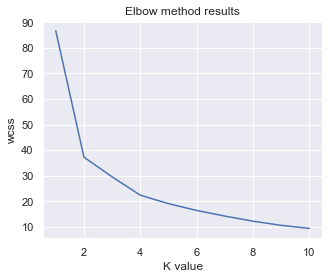

In [72]:
x6 = customers.drop(['CustomerID'] , axis=1)

elbow_method(x6)
plt.show()

In [73]:
array = (kmeans_func(x6,2,0)[0] == customers.Gender.values.astype(int))

np.count_nonzero(array == False) 

# So this clustering values are also same as gender values. So This doesnt make any sense.

0

### Using dimentionality reduction Technique (PCA)

Now I will perform these techniques using all the features with principal component analysis(PCA) which is a dimensional reduction technique.

         f1        f2
0  0.532955 -0.227841
1  0.513939 -0.493080
2 -0.446266  0.087079
3 -0.478796 -0.366617
4 -0.451984  0.003006


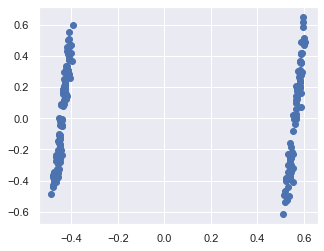

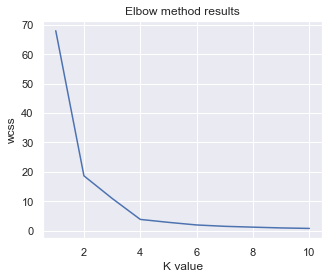

In [74]:
pca = PCA(n_components=2 , random_state=100)
x_pca = pd.DataFrame(pca.fit_transform(customers.drop(['CustomerID'] ,axis='columns')) , columns=['f1','f2'])

print(x_pca.head())

#this x_pca is the final data with only 2 features which represents all the four inportant features.
plt.figure(figsize=(5,4))
plt.scatter(x_pca.f1,x_pca.f2)

elbow_method(x_pca)

In [75]:
array = (kmeans_func(x_pca,2,0)[0] == customers.Gender.values.astype(int))

np.count_nonzero(array == False) 

# So this clustering values are also same as gender values. So This doesnt make any sense.

0

## Final DataFrame

In [76]:
# This is the grand final dataset with which we can visualize any clustered segments of customers
final_result.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
0,1,19,15,39,0,4,1,3
1,2,21,15,81,0,3,1,3
2,3,20,16,6,1,4,0,3
3,4,23,16,77,1,3,1,3
4,5,31,17,40,1,4,1,3


# 7. Visualizaing and Analyzing the clustered data for effective business:

In [77]:
# Let us generalize this.

def visulaize_clustered_data(x , y = 'Spending Score (1-100)' , filter_by_gender= 1, filter_only_male =0, filter_only_female =0):
    try : 
        marker = lambda k:  '.' if k == 1 else '+'

        plt.figure(figsize=(6,6))

        if x == 'Age':
            cluster_col = 'AgeVSscore_cluster'
        elif x == 'Annual Income (k$)':
            cluster_col = 'IncomeVSscore_cluster'
        else:
            print(f"The value of x must be either 'Age' , or 'Annual Income (k$)'")
            return 0 


        def color(x):
            if x==0:
                return 'b'
            elif x==1:
                return 'c'
            elif x==2:
                return 'r'
            elif x==3:
                return 'y'
            elif x==4:
                return 'g'
            else :
                return 'w'

        for i in set(final_result[cluster_col].values):

            if filter_by_gender == 1 :
                if filter_only_male == 1:
                    gender_val = [0]
                if filter_only_female == 1:
                    gender_val = [1]

                if filter_only_male ==  filter_only_female:
                    gender_val = final_result.Gender.values
                
                for j in set(gender_val):

                    plt.scatter(final_result[x][final_result[cluster_col]==i][final_result.Gender == j] ,
                                final_result['Spending Score (1-100)'][final_result[cluster_col]==i][final_result.Gender == j] ,
                                marker = marker(j),c=color(i),
                                label = f'Gender : {j} , cluster : {i}'

                               )
            elif filter_by_gender == 0 :
                

                plt.scatter(final_result[x][final_result[cluster_col]==i] ,
                            final_result['Spending Score (1-100)'][final_result[cluster_col]==i],
                            label = f' cluster : {i}'
                           )
            else:
                print('Error : There is something wrong with the values you have provided')
                return

        plt.xlabel(x)
        plt.ylabel('Spending Score')
        plt.legend()
        plt.show()

        plt.figure(figsize=(6,6))
        sns.countplot(x=cluster_col , data=final_result)
        plt.xlabel(cluster_col)
        plt.show()

        plt.figure(figsize=(6,6))
        sns.countplot(x=cluster_col , data=final_result , hue='Gender')
        plt.xlabel(cluster_col)
        plt.show()

        plt.figure(figsize=(6,6))

        n = 0
        for col in ['Age'  , 'Spending Score (1-100)','Annual Income (k$)']:
            n+=1
            plt.subplot(3,1,n)
            plt.subplots_adjust(hspace=0.5)

            sns.violinplot(y=col , x=cluster_col , data = final_result)
    except:
        print('Error : There is something wrong with the values you have provided')
        return

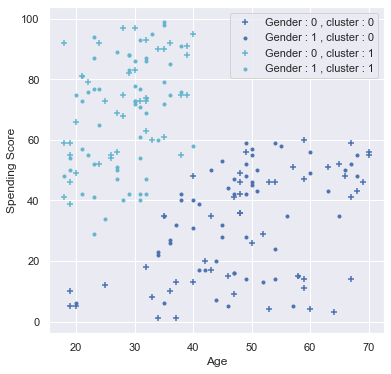

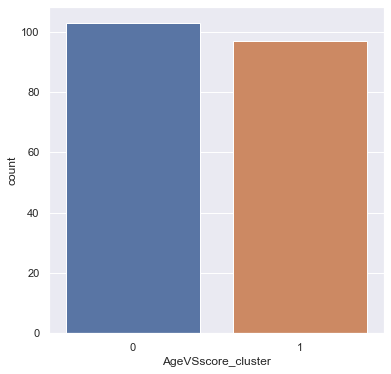

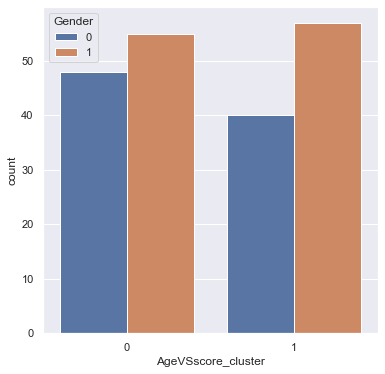

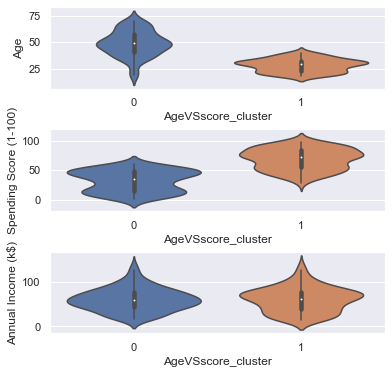

In [78]:
visulaize_clustered_data('Age' , filter_by_gender=1)

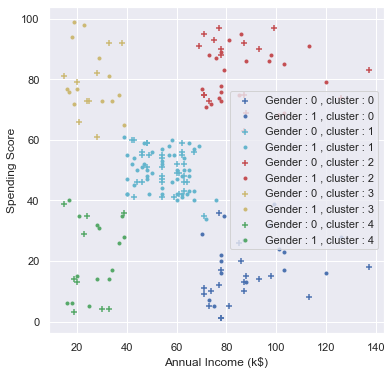

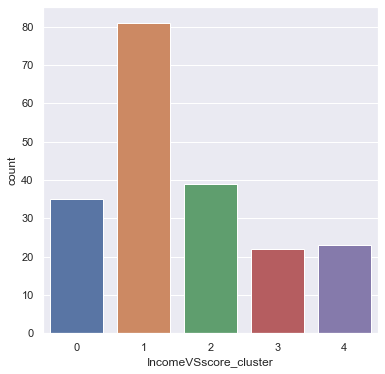

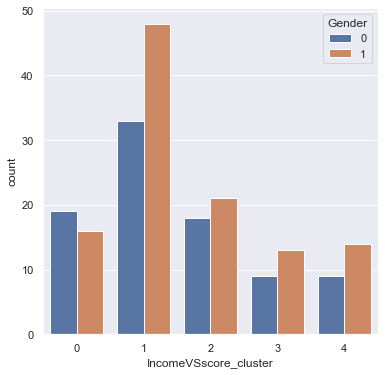

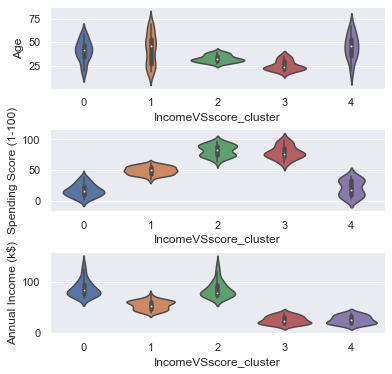

In [79]:
visulaize_clustered_data('Annual Income (k$)')

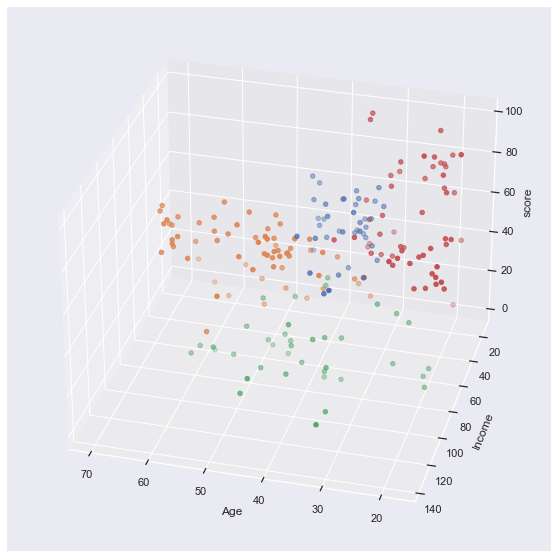

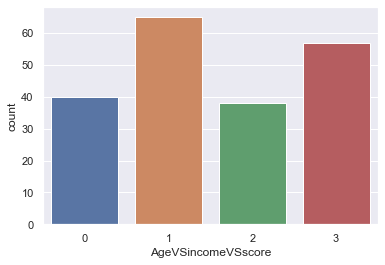

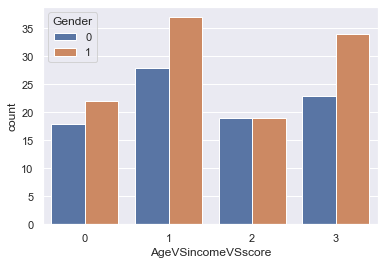

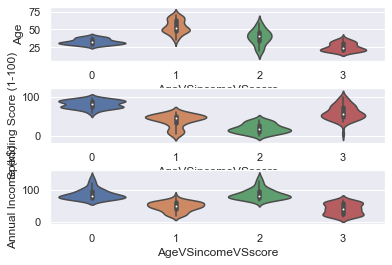

In [80]:
# Visualizing the third cluster

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111,projection='3d')
for cl in set(final_result['AgeVSincomeVSscore']):
    ax.scatter(final_result['Age'][final_result['AgeVSincomeVSscore']==cl] , final_result['Annual Income (k$)'][final_result['AgeVSincomeVSscore']==cl], final_result['Spending Score (1-100)'][final_result['AgeVSincomeVSscore']==cl])
ax.view_init(30,105)
plt.xlabel('Age')
plt.ylabel('Income')
ax.set_zlabel('score')
plt.show()


sns.countplot(x='AgeVSincomeVSscore' , data=final_result)
plt.show()
sns.countplot(x='AgeVSincomeVSscore' , data=final_result, hue='Gender')
plt.show()

n = 0
for col in ['Age'  , 'Spending Score (1-100)','Annual Income (k$)']:
    n+=1
    plt.subplot(3,1,n)
    plt.subplots_adjust(hspace=0.5)

    sns.violinplot(y=col , x='AgeVSincomeVSscore' , data = final_result)

In [81]:
final_result[final_result['IncomeVSscore_cluster'] == 4]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
0,1,19,15,39,0,4,1,3
2,3,20,16,6,1,4,0,3
4,5,31,17,40,1,4,1,3
6,7,35,18,6,1,4,0,1
8,9,64,19,3,0,4,0,1
10,11,67,19,14,0,4,0,1
12,13,58,20,15,1,4,0,1
14,15,37,20,13,0,4,0,1
16,17,35,21,35,1,4,0,3
18,19,52,23,29,0,4,0,1


In [82]:
# What if we want all the customers of green color above:
    
#     i.e customers who belong to  cluster 4 of incomeVSscore_cluster

# Now we can treat these customers better to increase their spending scores, but offering more discounts and offers.

(final_result[final_result['IncomeVSscore_cluster'] ==4][final_result.Gender==0])

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
0,1,19,15,39,0,4,1,3
8,9,64,19,3,0,4,0,1
10,11,67,19,14,0,4,0,1
14,15,37,20,13,0,4,0,1
18,19,52,23,29,0,4,0,1
20,21,35,24,35,0,4,0,3
30,31,60,30,4,0,4,0,1
32,33,53,33,4,0,4,0,1
42,43,48,39,36,0,4,0,1


In [83]:
(final_result[final_result['IncomeVSscore_cluster'] ==4][final_result.Gender==1])

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
2,3,20,16,6,1,4,0,3
4,5,31,17,40,1,4,1,3
6,7,35,18,6,1,4,0,1
12,13,58,20,15,1,4,0,1
16,17,35,21,35,1,4,0,3
22,23,46,25,5,1,4,0,1
24,25,54,28,14,1,4,0,1
26,27,45,28,32,1,4,0,1
28,29,40,29,31,1,4,0,1
34,35,49,33,14,1,4,0,1


#  8. Finally lets rank our customers
(based on their spending score )

In [84]:
final_result.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore
0,1,19,15,39,0,4,1,3
1,2,21,15,81,0,3,1,3
2,3,20,16,6,1,4,0,3
3,4,23,16,77,1,3,1,3
4,5,31,17,40,1,4,1,3


In [85]:
final_result['Spending Score (1-100)'].describe().get('75%')

73.0

In [86]:
threshold_plus = final_result['Spending Score (1-100)'].describe().get('75%')

In [87]:
final_result['rank'] = np.where(final_result['Spending Score (1-100)'] > threshold_plus, 'plus','normal')

In [88]:
final_result.head(20)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,IncomeVSscore_cluster,AgeVSscore_cluster,AgeVSincomeVSscore,rank
0,1,19,15,39,0,4,1,3,normal
1,2,21,15,81,0,3,1,3,plus
2,3,20,16,6,1,4,0,3,normal
3,4,23,16,77,1,3,1,3,plus
4,5,31,17,40,1,4,1,3,normal
5,6,22,17,76,1,3,1,3,plus
6,7,35,18,6,1,4,0,1,normal
7,8,23,18,94,1,3,1,3,plus
8,9,64,19,3,0,4,0,1,normal
9,10,30,19,72,1,3,1,3,normal


<AxesSubplot:xlabel='rank', ylabel='count'>

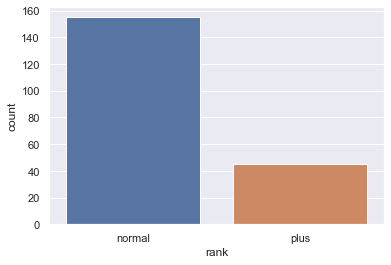

In [89]:
sns.countplot(final_result['rank'])

In [90]:
final_result['rank'].value_counts()

normal    155
plus       45
Name: rank, dtype: int64

In [91]:
(final_result['rank'] == 'plus').mean()

0.225

In [92]:
(final_result['rank'] == 'normal').mean()

0.775

 So now we can even visualize our customers based on his rank.

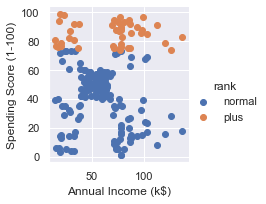

In [93]:
sns.FacetGrid(data =final_result , hue = 'rank').map(plt.scatter,'Annual Income (k$)' , 'Spending Score (1-100)').add_legend()

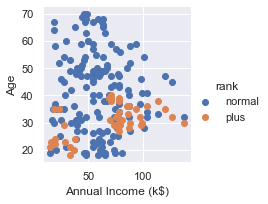

In [94]:
sns.FacetGrid(data =final_result , hue = 'rank').map(plt.scatter,'Annual Income (k$)' , 'Age').add_legend()